Use the IQ-module for deconvolution

In [2]:
from pyrpl import Pyrpl
r = Pyrpl(hostname="rp-f08dd4",gui=True).rp

DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None 

In [28]:
#reload to make sure settings are default ones

#shortcut
iq = r.iq2 # should use iq2 for deconv since this one has two outputs and four filters
s = r.scope
asg = r.asg0
asg.setup(waveform='sin', frequency=1e6 + 200, amplitude=0.5, offset=0, trigger_source='immediately')
iq.setup(
    input = 'in1',
    frequency=1.2e6,
    bandwidth=[10e5]*4, # 4th order filter
    gain=0,
    phase=0,
    acbandwidth=0,
    quadrature_factor = 1, # Supremely important it does not work without does for some reason
    amplitude=1,
    output_direct='off',
    output_signal='quadrature')
s.setup(input1='iq2', # I
            input2='iq2_2', # Q 
            average=True,
            decimation = 2**14,
            trigger_source="immediately",
            ch1_active=True,
            ch2_active=True)

[-0.0177002  -0.01623535 -0.01330566 ... -0.00354004 -0.01586914
 -0.0090332 ]
[-0.00488281 -0.00476074 -0.00476074 ... -0.00488281 -0.00488281
 -0.00476074]


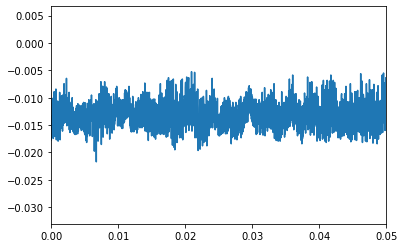

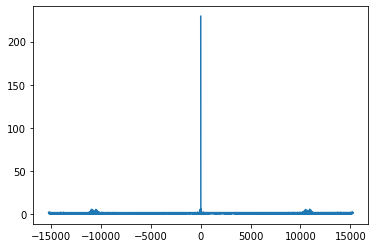

In [31]:
import time
import matplotlib.pyplot as plt
import numpy as np
def get_traces():
    s._start_trace_acquisition()
    time.sleep(s.duration)
    ch1,ch2 = s._get_trace()
    t = s.times
    return ch1,ch2,t
s.decimation = 2**12
I,Q,t = get_traces()
plt.plot(t,I)
plt.xlim(0,0.05)
plt.figure()
print(I)
print(Q)
IQ_data = I+1j*Q
fft_data = np.fft.fft(IQ_data)
freqs = np.fft.fftfreq(len(IQ_data), t[1]-t[0])
plt.plot(freqs,np.abs(fft_data))

In [30]:
print(freqs[np.argmax(fft_data)])

-1158714.2944335935
